<a href="https://colab.research.google.com/github/Jannat3226/Detect-lungcancer/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1)Importing the required libraries

2) Loading the data

3) Data analysis

4) Model building

In [ ]:
#Importing the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, confusion_matrix ,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette = 'deep', rc = {'axes.grid':True})
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/fall23/archive_9/survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

**Symptoms of lung cancer**

The columns include both symptoms and non-symptoms of cancer.

For this problem, i would use just the symptoms as my features to predict the clinical outcome of lung cancer.

The 8 symptoms in this dataset are are:
* Yellow fingers
* Anxiety
* Fatigue
* Wheezing
* Coughing
* Shortness of breathe
* Swallowing difficulty
* Chest pain



In [ ]:
data_new = data.drop(['GENDER','AGE', 'SMOKING', 'ALCOHOL CONSUMING', 'CHRONIC DISEASE', 'PEER_PRESSURE', 'ALLERGY '], axis = 1)
symptoms = [ 'YELLOW_FINGERS', 'ANXIETY', 'FATIGUE ',  'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
X = data_new[symptoms]
y = data_new.LUNG_CANCER
X.head()


,YELLOW_FINGERS,ANXIETY,FATIGUE,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,2,2,2,2,2,2,2,2
1,1,1,2,1,1,2,2,2
2,1,1,2,2,2,2,1,2
3,2,2,1,1,1,1,2,2
4,2,1,1,2,2,2,1,1


from matplotlib import pyplot as plt
_df_0['YELLOW_FINGERS'].plot(kind='hist', bins=20, title='YELLOW_FINGERS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ANXIETY'].plot(kind='hist', bins=20, title='ANXIETY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['FATIGUE '].plot(kind='hist', bins=20, title='FATIGUE ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['WHEEZING'].plot(kind='hist', bins=20, title='WHEEZING')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='YELLOW_FINGERS', y='ANXIETY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='ANXIETY', y='FATIGUE ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='FATIGUE ', y='WHEEZING', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='WHEEZING', y='COUGHING', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['YELLOW_FINGERS'].plot(kind='line', figsize=(8, 4), title='YELLOW_FINGERS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['ANXIETY'].plot(kind='line', figsize=(8, 4), title='ANXIETY')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['FATIGUE '].plot(kind='line', figsize=(8, 4), title='FATIGUE ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['WHEEZING'].plot(kind='line', figsize=(8, 4), title='WHEEZING')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
y.head()

0    YES
1    YES
2     NO
3     NO
4     NO
Name: LUNG_CANCER, dtype: object

**Splitting the data into training and testing set**

.

The data is split into **80/20**. 80% of the data would be used for training the model to predict the status of lung cancer from symptoms while the remaining 20% of the data would be used for testing the model accuracy.

I will use a random_state of **42** so i can always get the same split everytime i run the code. I will also stratify the split with **y** so the training set would be identical to the full set of the data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state = 42, stratify = y)

checking for missing entries

In [ ]:
X_train.isnull().sum()

YELLOW_FINGERS           0
ANXIETY                  0
FATIGUE                  0
WHEEZING                 0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
dtype: int64

No missing entries were detected.

I would check for categorical data now.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   YELLOW_FINGERS         309 non-null    int64
 1   ANXIETY                309 non-null    int64
 2   FATIGUE                309 non-null    int64
 3   WHEEZING               309 non-null    int64
 4   COUGHING               309 non-null    int64
 5   SHORTNESS OF BREATH    309 non-null    int64
 6   SWALLOWING DIFFICULTY  309 non-null    int64
 7   CHEST PAIN             309 non-null    int64
dtypes: int64(8)
memory usage: 19.4 KB


In [ ]:
le = LabelEncoder()
y_train= le.fit_transform(y_train)
y_test= le.transform(y_test)

Evaluating the distribution of data in the **feature columns**.

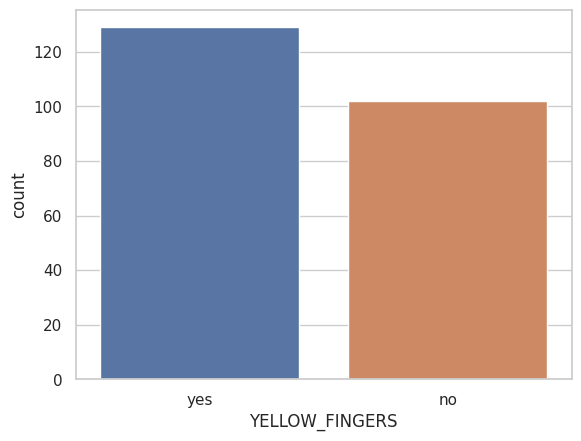

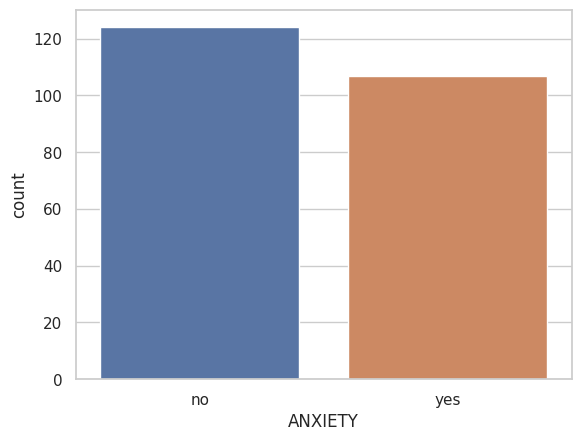

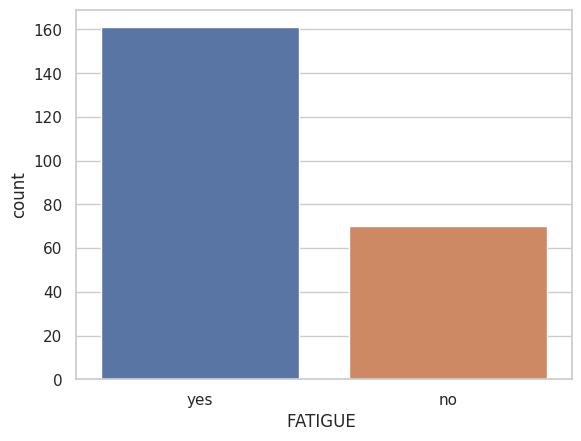

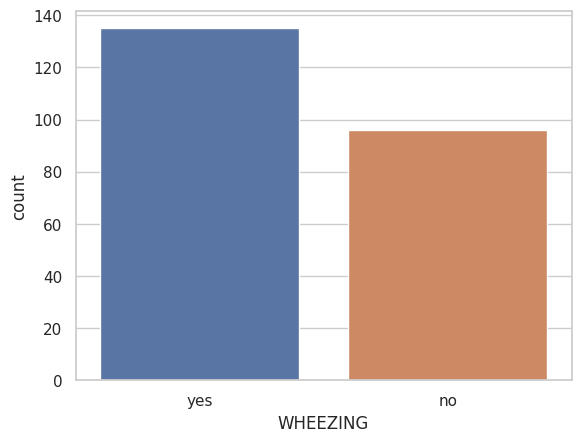

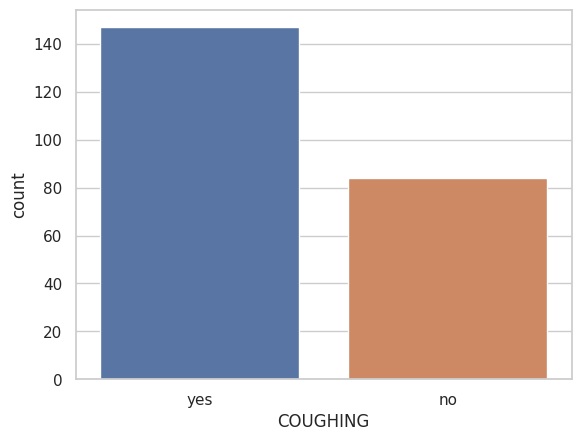

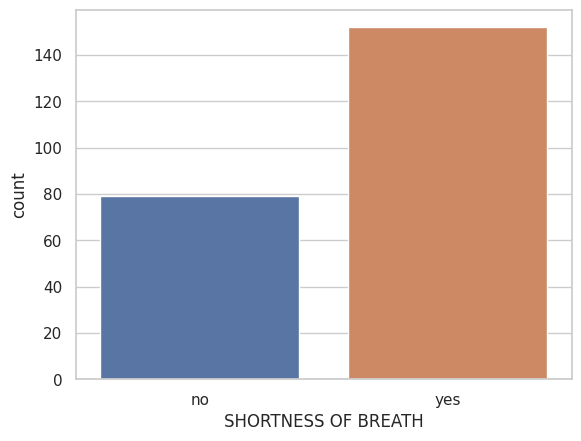

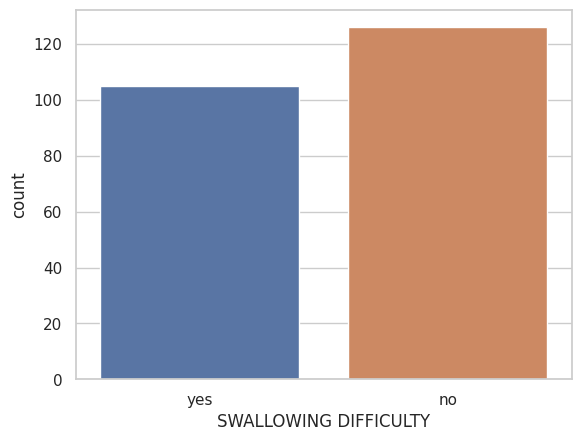

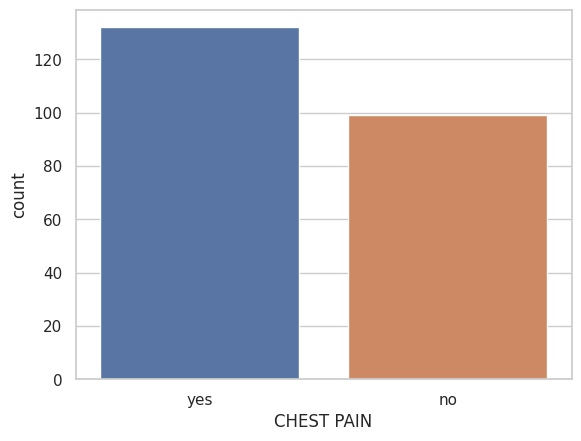

In [ ]:
key = {2: 'yes', 1: 'no'}
for sys in symptoms:
	sns.countplot(x = X_train[sys].replace(key))
	plt.show()

Evaluating the distribution of data in the **target column**.

<Axes: ylabel='count'>

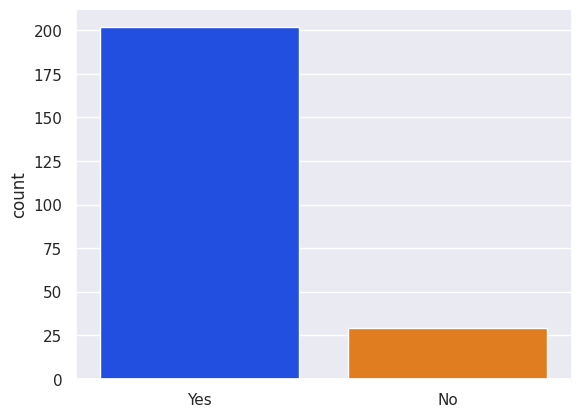

In [ ]:
sns.set(style = 'darkgrid',palette = 'bright')
sns.countplot(x = pd.Series(y_train).replace([0,1],['No','Yes']))

**Building the random forest model**

Fitting the model with the data, predicting with the model and calculating the accuracy score of the model.

In [ ]:
model =  RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The accuracy score of this Random Forest Classifier model is: {0:.1f}%'.format(100*accuracy_score(y_test, y_pred)))

The accuracy score of this Random Forest Classifier model is: 92.3%


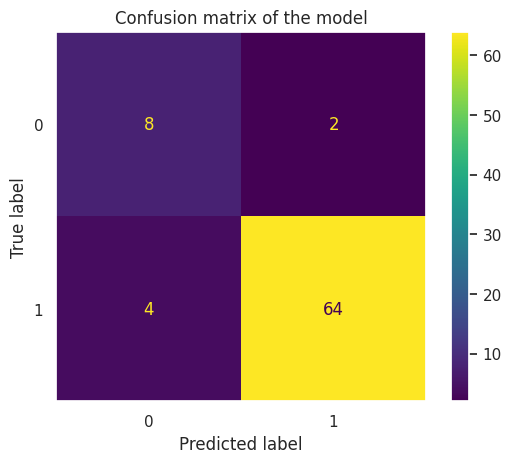

In [ ]:
sns.set(rc = {'axes.grid':False})
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix of the model')
plt.show()

The confusion matrix is a table that describes the performance of a classification model. This model was able to correctly predict positive cases 64 times out of 68 times and correctly predict negative cases 8 times out of 10. This shows a high precision of the model.

In [ ]:
print('The precision of this model is {0:.1f}%'.format(100* precision_score(y_test,y_pred)))

print ('The recall score of this model is {0:.1f}%'.format(100*recall_score(y_test, y_pred)))

print('The harmonic mean of the precision score and recall score is:', f1_score(y_test,y_pred))

The precision of this model is 97.0%
The recall score of this model is 94.1%
The harmonic mean of the precision score and recall score is: 0.955223880597015


These plot shows that a person who experiences shortness of breath, who coughs and wheezes often, has yellow fingers and is easily fatigued, has a high probability of being positive for lung cancer.

In [ ]:
#features importance
Symptoms_importance = pd.DataFrame(  {"Symptoms": list(X.columns), "importance": model.feature_importances_}).sort_values("importance", ascending=False)
# Display
print(Symptoms_importance)

                Symptoms  importance
0         YELLOW_FINGERS    0.152723
4               COUGHING    0.150052
7             CHEST PAIN    0.133490
2               FATIGUE     0.124247
3               WHEEZING    0.122971
1                ANXIETY    0.120900
5    SHORTNESS OF BREATH    0.106120
6  SWALLOWING DIFFICULTY    0.089497


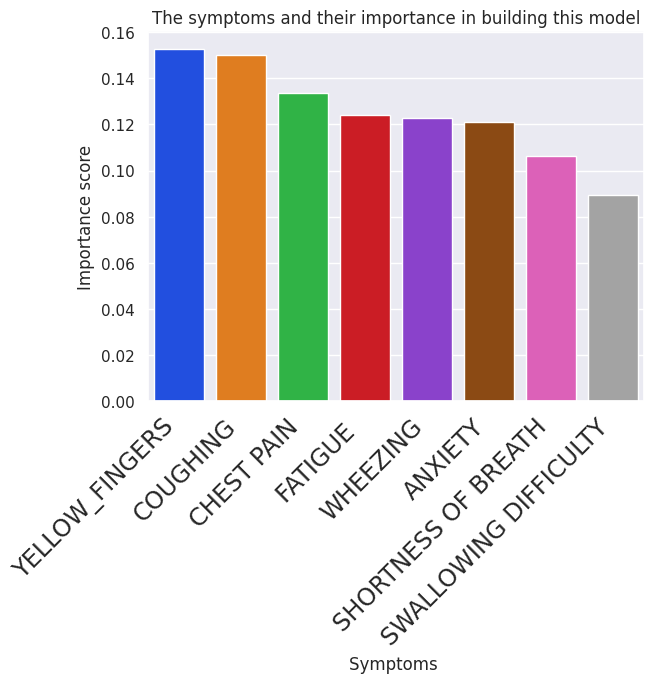

In [ ]:
# Creating a bar plot
sns.set(palette = 'bright',rc ={'axes.grid':True})
sns.barplot(x=Symptoms_importance.Symptoms, y=Symptoms_importance.importance)
plt.xlabel("Symptoms ")
plt.ylabel("Importance score")
plt.title("The symptoms and their importance in building this model")
plt.xticks( rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")
plt.show()